# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [9]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# 設定 data_path
dir_data = '../data/'

In [11]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
a0 = app_train[app_train["CNT_CHILDREN"] == 0]
a0["CNT_CHILDREN"].value_counts()

0    215371
Name: CNT_CHILDREN, dtype: int64

In [13]:
a1_2 = app_train[app_train["CNT_CHILDREN"] > 0]
a1_2 = a1_2[a1_2["CNT_CHILDREN"] < 3]
a1_2["CNT_CHILDREN"].value_counts()

1    61119
2    26749
Name: CNT_CHILDREN, dtype: int64

In [14]:
a3_5 = app_train[app_train["CNT_CHILDREN"] > 2]
a3_5 = a3_5[a3_5["CNT_CHILDREN"] < 6]
a3_5["CNT_CHILDREN"].value_counts()

3    3717
4     429
5      84
Name: CNT_CHILDREN, dtype: int64

In [15]:
a5_up = app_train[app_train["CNT_CHILDREN"] > 5]
a5_up["CNT_CHILDREN"].value_counts()

6     21
7      7
14     3
19     2
12     2
10     2
9      2
8      2
11     1
Name: CNT_CHILDREN, dtype: int64

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [16]:
#1
"""
Your code here
"""
cut_rule = [-1, 0,   2, 5, 999]
#lb = ["0 個小孩", "有 1 - 2 個小孩", "有 3 - 5 個小孩", "有超過 5 個小孩"]
lb = [0,1,2,3]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, labels=lb)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0    215371
1     87868
2      4230
3        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [17]:
print(app_train['CNT_CHILDREN_GROUP'].isnull().value_counts())
print(app_train['AMT_INCOME_TOTAL'].isnull().value_counts())
print(app_train['TARGET'].isnull().value_counts())

#print(app_train['CNT_CHILDREN_GROUP'].cumsum())
print(app_train['CNT_CHILDREN_GROUP'].head())
#print(app_train['TARGET'].cumsum().value_counts())
#app_train['CNT_CHILDREN'].head()

False    307511
Name: CNT_CHILDREN_GROUP, dtype: int64
False    307511
Name: AMT_INCOME_TOTAL, dtype: int64
False    307511
Name: TARGET, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: CNT_CHILDREN_GROUP, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [20]:
#2-1
"""
Your code here
"""
grp = ["CNT_CHILDREN_GROUP", "TARGET"]

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
0                   0         166747.010980
                    1         160804.210548
1                   0         174590.584401
                    1         176115.362720
2                   0         175053.742913
                    1         160677.385714
3                   0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

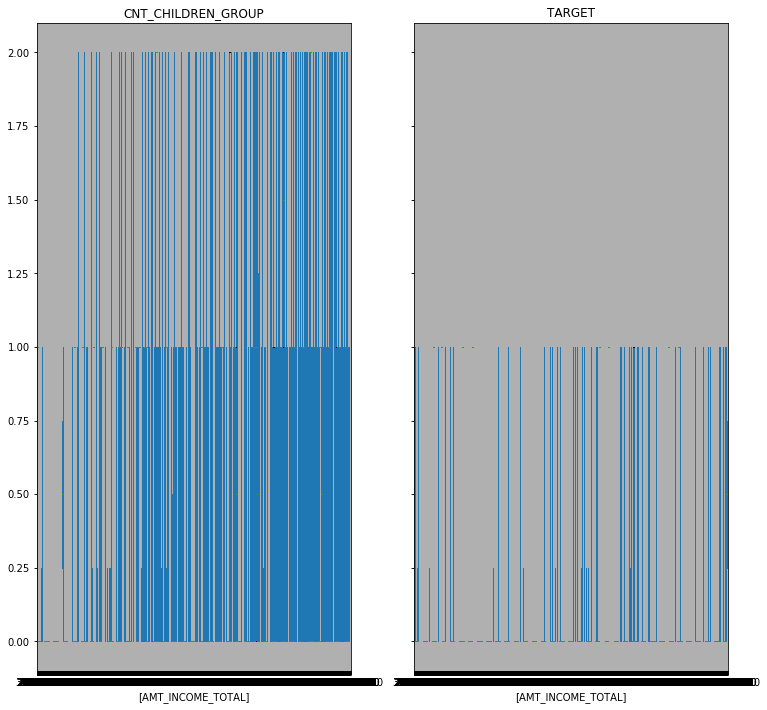

In [22]:
#2-2
"""
Your code here
"""
plt_column = ["CNT_CHILDREN_GROUP", "TARGET"]
plt_by = ["AMT_INCOME_TOTAL"]

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [21]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - x.mean()) / x.std() )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
